# Multilayer neural network on the MNIST data set 

In [250]:
from typing import List
# Write any import statements here
import numpy as np

def getHitProbability(R: int, C: int, G: List[List[int]]) -> float:
  # Write your code here
  n_battleship = 0
  for row in G:
    for item in row:
      if item == 1:
        n_battleship +=1
        
    
  return n_battleship/(R*C)

In [251]:
G = [[0,0,1],[1,0,1]]

print(G)

[[0, 0, 1], [1, 0, 1]]


In [252]:
np.array(G)[0,0]

0

In [253]:
getHitProbability(2,3,G)

0.5

In [1]:
# %matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
 
import os
import requests, zipfile, io
import importlib

import neuralnet

from tensorflow import keras
import tensorflow as tf

Init Plugin
Init Graph Optimizer
Init Kernel


In [200]:
#some helper functions 
from sklearn import preprocessing 

def scale_data(x): 
    '''
        scales input data
    '''
    Nsamples = x.shape[0]
    x_processed = x.reshape(Nsamples,-1)
    scaler = preprocessing.StandardScaler().fit(x_processed)
    x_scaled = x_processed.astype(np.float32) /255.0 #scaler.transform(x_processed)
    
    return x_scaled, scaler 

def pre_process(x,y):
    #scale input data
    x_process, _ = scale_data(x)
    #apply one-hot encoding to output labels
    y_process = preprocessing.OneHotEncoder().fit_transform(y[:,np.newaxis]) 
    y_process = y_process.toarray()
    return (x_process, y_process)



## Load MNIST dataset

I load the MNIST data set from `Keras` dataset.

In [201]:
#TODO:  scale x_train (inputs), using helper function
#TODO:  reshape x_train (inputs), using helper functions
#TODO:  apply one-shot encoding to outputs, using helper function 
#TODO:  run network and evaluate performance


In [234]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = keras.datasets.mnist.load_data()

Explore some images

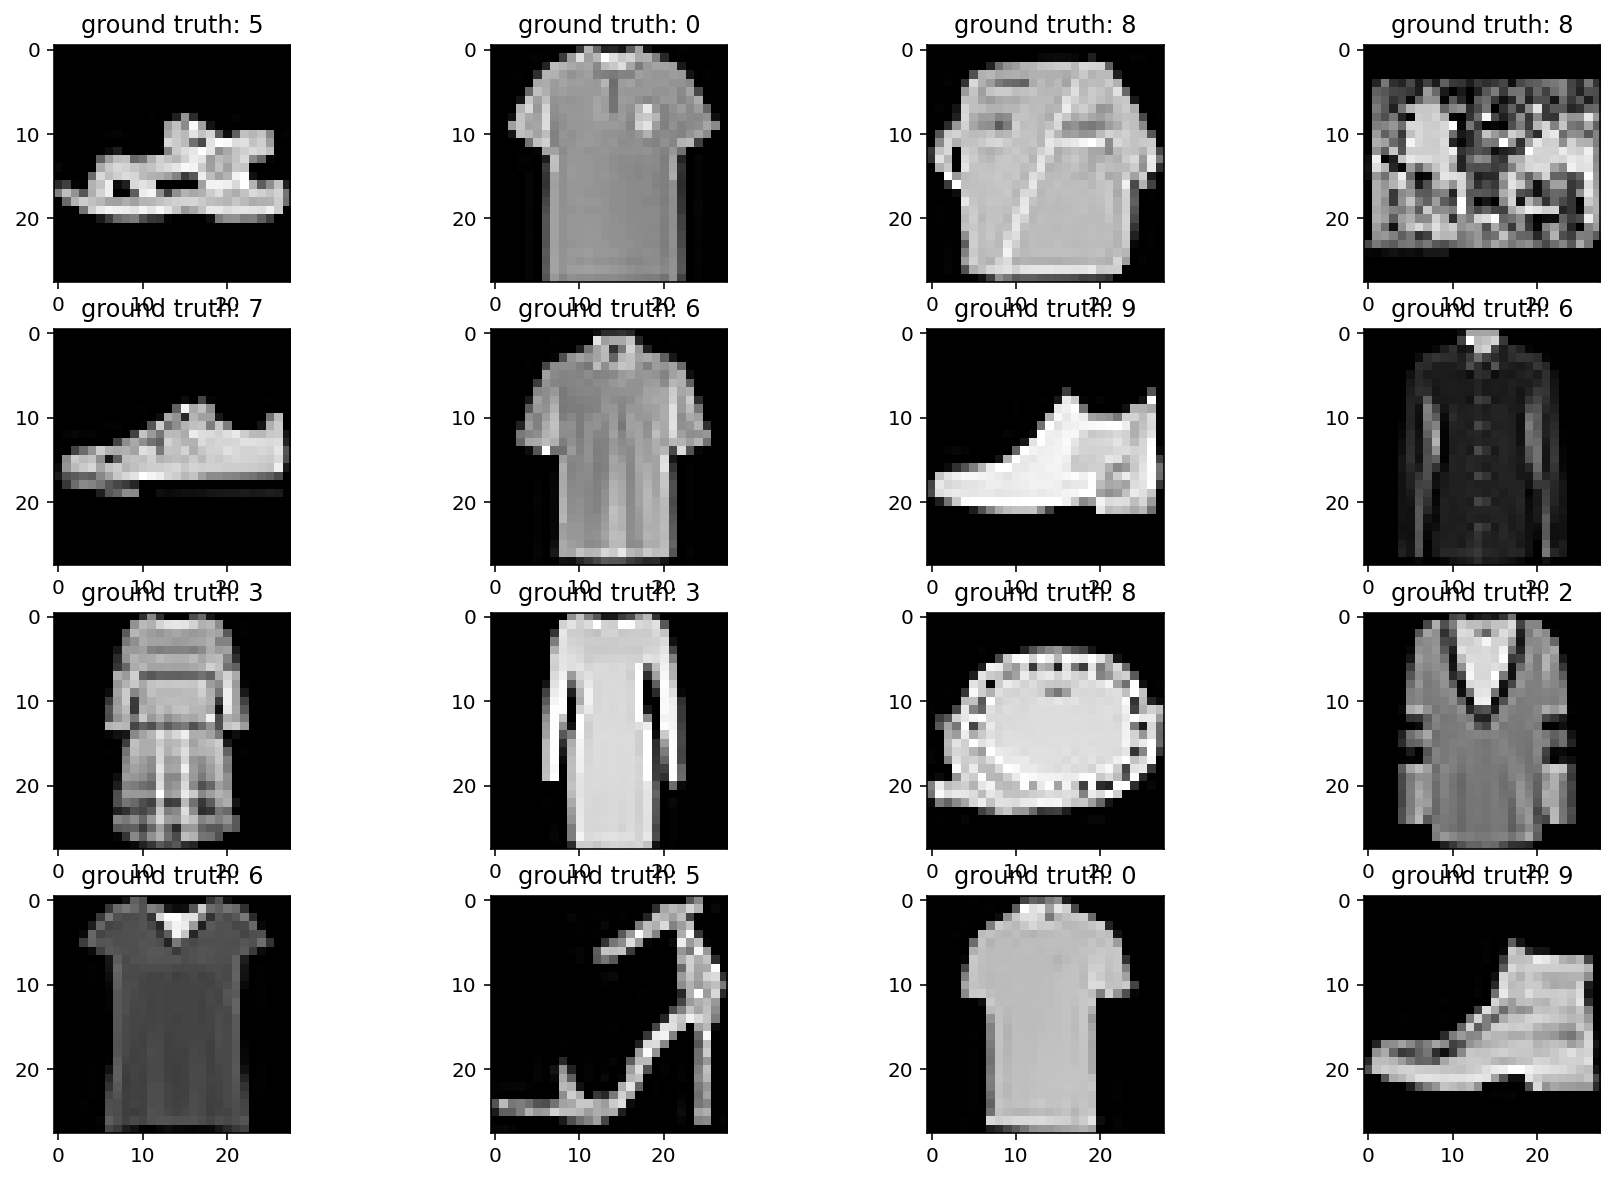

In [235]:
def plot_images(x, y_labels, img_idx, vmin=0, vmax=255, NROWS = 4, NCOLS = 4):
 
    fig, axes = plt.subplots(NROWS,NCOLS, figsize=(15,10))

    ctr = 0

    for row in range(NROWS):
        for col in range(NCOLS):
            idx = img_idx[ctr]
            axes[row,col].imshow(x[idx,:,:], cmap='gray', vmin=vmin, vmax=vmax)
            axes[row,col].set_title(f'ground truth: {y_labels[idx]}')
            ctr += 1

    plt.show()

NROWS = 4
NCOLS = 4
img_idx = np.random.choice(x_train_raw.shape[0], size = NROWS*NCOLS)     
plot_images(x_train_raw, y_train_raw, img_idx)  

Prepare data for network training and validation

- Split training data into two parts: one set of `50000` records for training and the rest and `10000` records for model validation. 
- Preprocess data
    - Reshape training, validation, test data from 2D array (pixel image space) to 1D array 
    - Apply one-hot encoding to output labels in training data set 
    

In [236]:
N_samples_validation = 10000
N_features = 784 

#training data
(x_train, y_train) = pre_process(x_train_raw[0:-N_samples_validation,:,:], y_train_raw[0:-N_samples_validation])

#validation data
(x_validation, y_validation) = pre_process(x_train_raw[-N_samples_validation:,:,:], y_train_raw[-N_samples_validation:])

# x_validation = x_train_raw[-N_samples_validation:,:,:].reshape(-1,N_features)
# y_validation = y_train_raw[-N_samples_validation:]


#test data 
(x_test, y_test) = pre_process(x_test_raw, y_test_raw)
# x_test  = x_test_raw.reshape(-1, N_features) 
# y_test  = y_test_raw



In [237]:
importlib.reload(neuralnet)

<module 'neuralnet' from '/Users/ricardojimenezmartinez/Desktop/DLND-project1-your-first-network/neuralnet.py'>

In [238]:
import sys

### Set the hyperparameters here ###
epochs = 400
learning_rate = 0.05
hidden_nodes = 40
output_nodes = 10

input_nodes = 784 

network_architecture = [input_nodes, hidden_nodes, output_nodes]

network = neuralnet.TheNeuralNetwork(network_architecture, learning_rate)

# network.train(x_train_raw[0:2,:,:].reshape(-1,784).tolist(), Aa[0:2,:].tolist() )
sel_idx = np.random.choice(10000,10000)

losses = {'train':[], 'validation':[]}
for e in range(epochs):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(x_train.shape[0], size= 500)
    for record, target in zip(x_train[batch,:], 
                              y_train[batch,:]):
        network.train(record, target)
    
    # Printing out the training progress
    
    pred_  = np.zeros(sel_idx.shape)
    accur_ = np.zeros(sel_idx.shape)
    for idx in sel_idx:
        pred_[idx] = np.argmax(network.predict(x_test[idx,:])) 
        if (pred_[idx] - y_test_raw[idx] ) == 0:
            accur_[idx] = 1
    
    train_loss = 100*(accur_.sum()/10000) #neuralnet.MSE(network.predict(x_train), y_train)
#     val_loss   = neuralnet.MSE(network.predict(x_validation), y_validation)
    
    sys.stdout.write("\rProgress: " + str(100 * e/float(epochs))[:4] \
                     + "% ... Accuracy: " + str(train_loss)) #[:5] ) \
#                      + " ... Validation loss: " + str(val_loss)[:5])
    
    losses['train'].append(train_loss)
#     losses['validation'].append(val_loss)

Progress: 99.7% ... Accuracy: 51.550000000000015

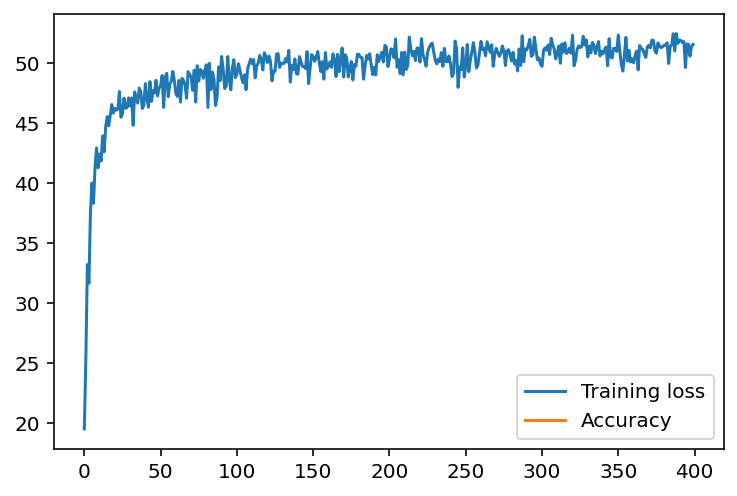

In [239]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Accuracy')
plt.legend()
# plt.ylim(ymax=0.5)

In [240]:
sel_idx = np.random.choice(10000,10000)

pred_  = np.zeros(sel_idx.shape)
accur_ = np.zeros(sel_idx.shape)

for idx in sel_idx:
    pred_[idx] = np.argmax(network.predict(x_test[idx,:])) 
    if (pred_[idx] - y_test_raw[idx] ) == 0:
        accur_[idx] = 1
    
print(f"Accuracy: { (accur_.sum()/10000)} ")    

plot_test = False     
if plot_test:
    fig, ax = plt.subplots()
    ax.scatter(y_test_raw, pred_)
    
print()    

# print('Prediction: ', np.argmax(network.predict(x_test[idx,:])))
# print('Ground_truth: ', y_test_raw[idx][0])

Accuracy: 0.5166 



In [241]:
idx = np.random.choice(10000)
print('Prediction: ', np.argmax(network.predict(x_train[idx,:])))
print('Ground_truth: ', y_train_raw[idx])
if (np.argmax(network.predict(x_train[idx,:])) - y_train_raw[idx] ) == 0:
    print('Yeah!')

Prediction:  0
Ground_truth:  0
Yeah!


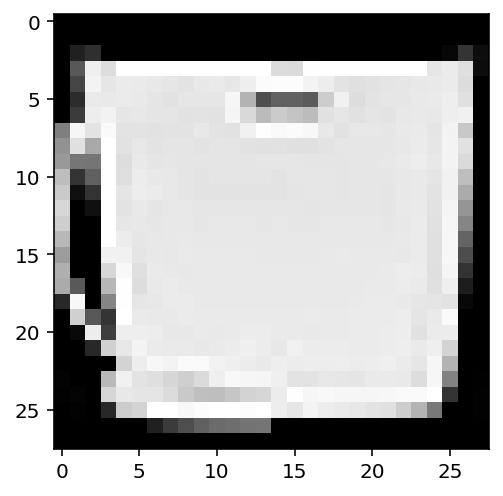

Model prediction: 8; ground truth: 8


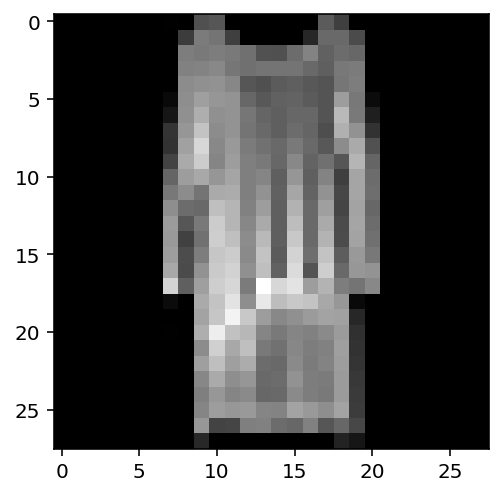

Model prediction: 3; ground truth: 2


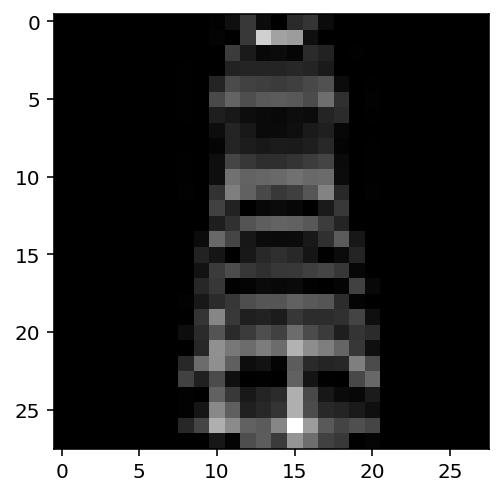

Model prediction: 3; ground truth: 3


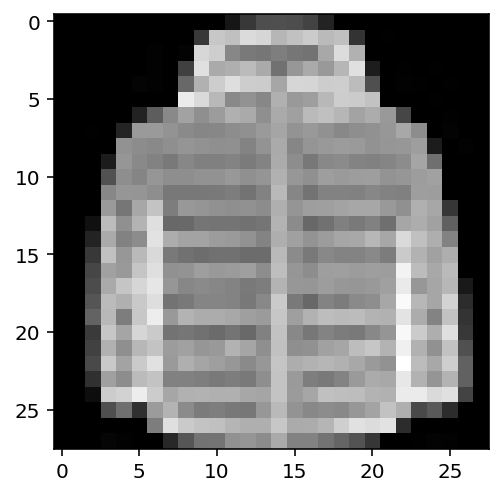

Model prediction: 4; ground truth: 4


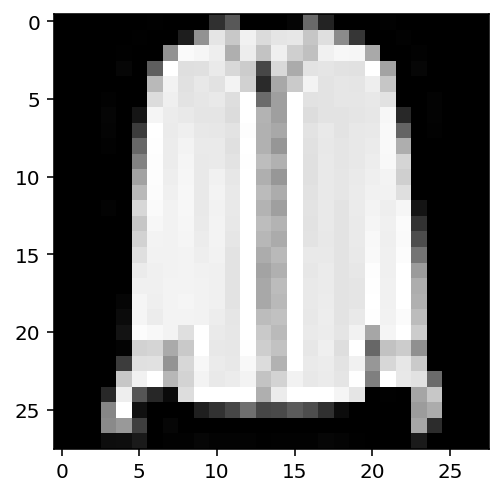

Model prediction: 4; ground truth: 6


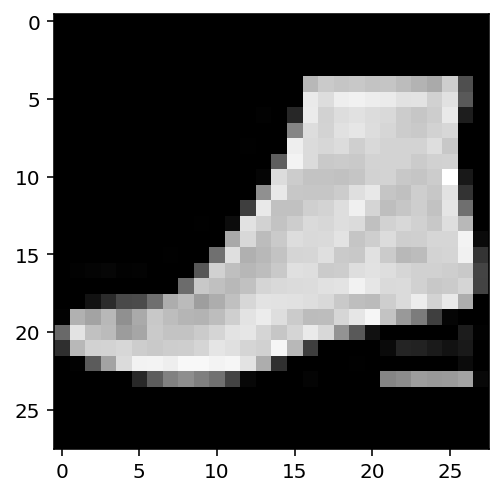

Model prediction: 9; ground truth: 9


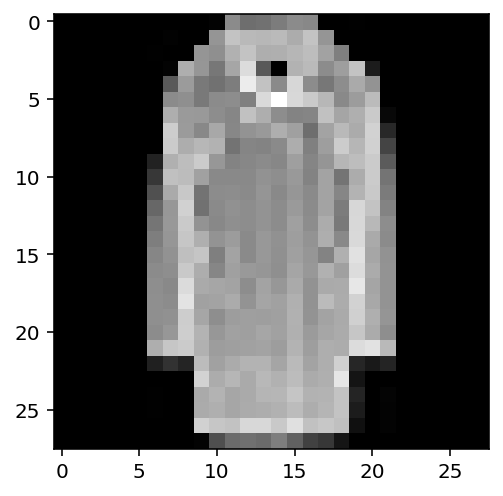

Model prediction: 4; ground truth: 4


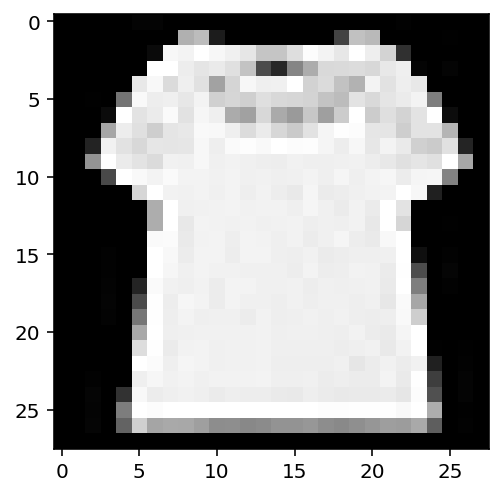

Model prediction: 2; ground truth: 6


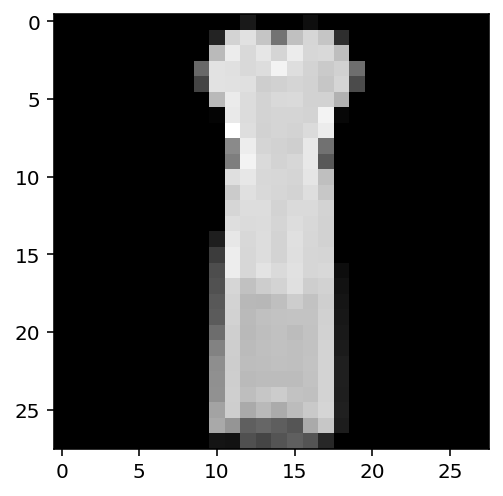

Model prediction: 3; ground truth: 3


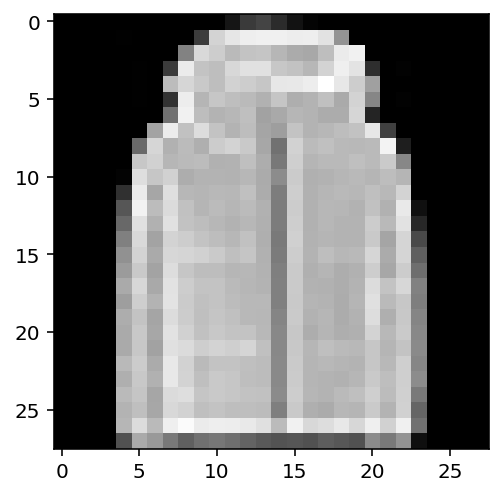

Model prediction: 4; ground truth: 4


In [243]:
# Predict n_images images from validation set.
n_images = 10
n_images_idx = np.random.choice( 10000, n_images)
test_images = x_test[n_images_idx]
test_labels = y_test[n_images_idx]

# Display image and model prediction.
for i in range(n_images):
    predictions = np.argmax(network.predict(test_images[i]))
    label = np.argmax(test_labels[i])
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print(f"Model prediction: {predictions}; ground truth: {label}" )

In [217]:
predictions

2